In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
columns = confirmed.keys()
confirmed_rows = confirmed.loc[:, columns[11]:columns[-1]]
deaths_rows = deaths.loc[:, columns[11]:columns[-1]]
# recoveries_rows = recoveries.iloc[:, columns[4]:columns[-1]]
# confirmed_rows.head()

In [4]:
dates = confirmed_rows.keys()
world_cases = []
total_deaths = [] 
# mortality_rate = []
# total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     mortality_rate.append(death_sum/confirmed_sum)
#     total_recovered.append(recovered_sum)

In [5]:
daysFrom_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
worldCases_confirmed = np.array(world_cases).reshape(-1, 1)
totalDeaths = np.array(total_deaths).reshape(-1, 1)
# totalRecovered = np.array(total_recovered).reshape(-1, 1)
# mortality = np.array(mortality_rate).reshape(-1,1)
#len(dates)
#world_cases

In [6]:
#predicting the future
futureDays = 15 
futureForecast = np.array([i for i in range(len(dates)+futureDays)]).reshape(-1, 1)
adjustedDates = futureForecast[:-15]
#future_forecast
# daysFrom_1_22.dtype

In [7]:
#convert integer to date-time
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(futureForecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [8]:
#for the confirmed cases
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(daysFrom_1_22, worldCases_confirmed, test_size=0.15, shuffle=True, random_state=109)

#for the death cases
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(daysFrom_1_22, totalDeaths, test_size=0.15, shuffle=False, random_state=109)

# #for the recoveries
# X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(daysFrom_1_22, totalRecovered, test_size=0.15, shuffle=False, random_state=109)

# #for the mortality
# X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(daysFrom_1_22, mortality, test_size=0.15, shuffle=False, random_state=109)

In [9]:
print("SVM method to predict number of confirmed cases:")
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

svm_search.best_params_

SVM method to predict number of confirmed cases:
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.0min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 1}

MAE: 67259.81848054058
MSE: 6973996834.051577


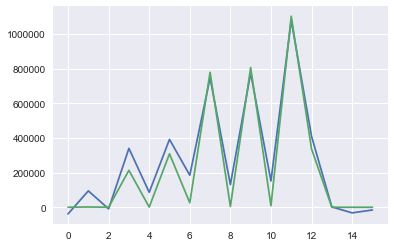

In [10]:
#SVM predictions for all the confirmed cases
svm_confirmed = svm_search.best_estimator_
#all the 104 values of confirmed cases
svm_pred = svm_confirmed.predict(futureForecast)
#len(svm_pred)
# the 14 predicted values
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
#svm_test_pred
#Accuracy (MSE, MAE)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
#plot of predicted values and the test split data
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)

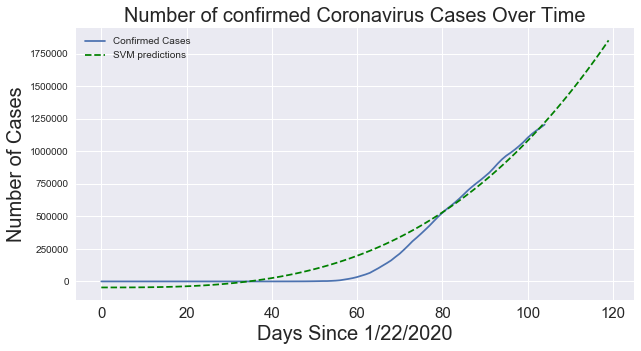

In [11]:
#SVM Predictions
plt.figure(figsize=(10, 5))
plt.plot(adjustedDates, worldCases_confirmed)
plt.plot(futureForecast, svm_pred, linestyle='dashed', color='green')
plt.title('Number of confirmed Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [12]:
print('SVM future predictions:')
print(set(zip(future_forecast_dates[-15:], svm_pred[-15:])))

SVM future predictions:
{('05/14/2020', 1578940.8403889278), ('05/16/2020', 1666772.008845959), ('05/06/2020', 1257622.352595959), ('05/09/2020', 1372608.893550549), ('05/19/2020', 1804364.5606037716), ('05/08/2020', 1333559.1773029903), ('05/17/2020', 1711849.994319592), ('05/10/2020', 1412388.4898029903), ('05/18/2020', 1757711.9262043575), ('05/13/2020', 1536174.1410481075), ('05/07/2020', 1295232.5828816036), ('05/20/2020', 1851814.6567951778), ('05/12/2020', 1494164.3554035763), ('05/15/2020', 1622471.2096516232), ('05/11/2020', 1452904.7241779903)}


In [13]:
from sklearn.externals import joblib
joblib.dump(svm_search, 'model_svm_c.pkl')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_svm_c.pkl']

In [14]:
svm_search = joblib.load('model_svm_c.pkl')

In [15]:
print("Linear Regression method to predict number of confirmed cases:")
#Applying Linear Regression  

linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
# All the 105 values predicted and training values
linear_pred = linear_model.predict(futureForecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
# test_linear_pred
#len(linear_pred)
print(linear_model.coef_)
print(linear_model.intercept_)

Linear Regression method to predict number of confirmed cases:
MAE: 178176.44223670446
MSE: 41554424258.82875
[[10260.17219911]]
[-269494.31136334]


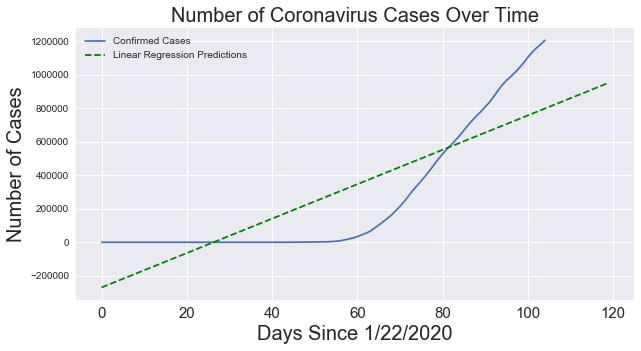

In [16]:
#Linear Regression Predictions
plt.figure(figsize=(10, 5))
plt.plot(adjustedDates, worldCases_confirmed)
plt.plot(futureForecast, linear_pred, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [17]:
print('Linear regression future predictions:')
print(linear_pred[-15:])

Linear regression future predictions:
[[807823.76954304]
 [818083.94174215]
 [828344.11394126]
 [838604.28614037]
 [848864.45833948]
 [859124.63053859]
 [869384.8027377 ]
 [879644.9749368 ]
 [889905.14713591]
 [900165.31933502]
 [910425.49153413]
 [920685.66373324]
 [930945.83593235]
 [941206.00813145]
 [951466.18033056]]


In [18]:
from sklearn.externals import joblib
joblib.dump(linear_model, 'model_reg_c.pkl')

['model_reg_c.pkl']

In [19]:
linear_model = joblib.load('model_reg_c.pkl')

In [20]:
print("Bayesian Ridge Regression method to predict number of confirmed cases:")
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_

Bayesian Ridge Regression method to predict number of confirmed cases:
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.0s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'tol': 0.0001,
 'lambda_2': 1e-06,
 'lambda_1': 1e-07,
 'alpha_2': 1e-06,
 'alpha_1': 0.0001}

MAE: 178314.12179334776
MSE: 41630866338.491


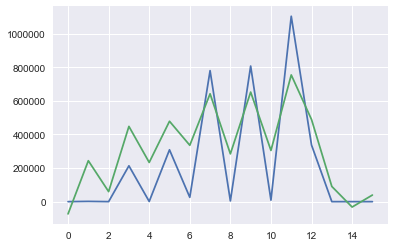

In [21]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(futureForecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

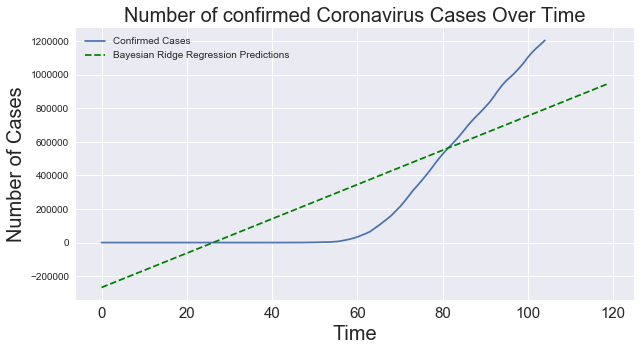

In [22]:
#Bayesian Ridge Regression Predictions
plt.figure(figsize=(10, 5))
plt.plot(adjustedDates, worldCases_confirmed)
plt.plot(futureForecast, bayesian_pred, linestyle='dashed', color='green')
plt.title('Number of confirmed Coronavirus Cases Over Time', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [23]:
print('Ridge regression future predictions:')
print(set(zip(future_forecast_dates[-15:], bayesian_pred[-15:])))

Ridge regression future predictions:
{('05/19/2020', 938021.938248665), ('05/08/2020', 825684.3845824845), ('05/14/2020', 886959.4138549467), ('05/16/2020', 907384.4236124341), ('05/17/2020', 917596.9284911776), ('05/12/2020', 866534.4040974592), ('05/20/2020', 948234.4431274087), ('05/10/2020', 846109.3943399718), ('05/07/2020', 815471.8797037409), ('05/15/2020', 897171.9187336903), ('05/11/2020', 856321.8992187156), ('05/13/2020', 876746.908976203), ('05/06/2020', 805259.3748249972), ('05/09/2020', 835896.8894612283), ('05/18/2020', 927809.4333699214)}


In [24]:
from sklearn.externals import joblib
joblib.dump(bayesian_search, 'model_bayesian_c.pkl')

['model_bayesian_c.pkl']

In [25]:
bayesian_search = joblib.load('model_bayesian_c.pkl')

In [26]:
#predictions for total_deaths
print("SVM method to predict number of deaths")
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, return_train_score=True, n_iter=40, verbose=1)
svm_search.fit(X_train_deaths, y_train_deaths)
svm_search.best_params_

SVM method to predict number of deaths
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.1min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'shrinking': False, 'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.1, 'C': 10}

MAE: 57532.92230156298
MSE: 3384833786.123886


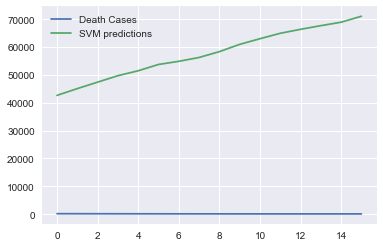

In [27]:
svm_deaths = svm_search.best_estimator_
svm_pred_death = svm_deaths.predict(futureForecast)
# check against testing data
svm_test_pred = svm_deaths.predict(X_test_deaths)
plt.plot(svm_test_pred)
plt.plot(y_test_deaths)
plt.legend(['Death Cases', 'SVM predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_deaths))
print('MSE:',mean_squared_error(svm_test_pred, y_test_deaths))

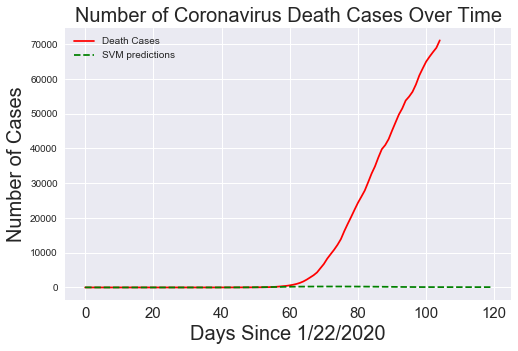

In [28]:
#SVM deaths predictions
plt.figure(figsize=(8, 5))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.plot(futureForecast, svm_pred_death, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Death Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Death Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [29]:
print('SVM future predictions:')
print(set(zip(future_forecast_dates[-14:], svm_pred_death[-14:])))

SVM future predictions:
{('05/10/2020', 96.9621198111151), ('05/18/2020', 96.63791196468539), ('05/16/2020', 96.6486719356195), ('05/15/2020', 96.66026422735854), ('05/20/2020', 96.63445156807533), ('05/09/2020', 97.14527619999811), ('05/08/2020', 97.41579466864897), ('05/19/2020', 96.6356856661162), ('05/17/2020', 96.64184865509193), ('05/07/2020', 97.80743361960273), ('05/11/2020', 96.84056802781741), ('05/14/2020', 96.67956876872081), ('05/13/2020', 96.7110798847052), ('05/12/2020', 96.76149748730195)}


In [30]:
from sklearn.externals import joblib
joblib.dump(svm_search, 'model_svm_d.pkl')

['model_svm_d.pkl']

In [31]:
svm_search = joblib.load('model_svm_d.pkl')

In [32]:
print("Linear Regression model to predict number of deaths")
#Linear Regression model for total deaths
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_deaths, y_train_deaths)
test_linear_pred = linear_model.predict(X_test_deaths)
linear_pred = linear_model.predict(futureForecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_pred, y_test_deaths))
print(linear_model.coef_)
print(linear_model.intercept_)

Linear Regression model to predict number of deaths
MAE: 37466.80177477018
MSE: 1457140698.1072884
[[286.4726762]]
[-7450.97752809]


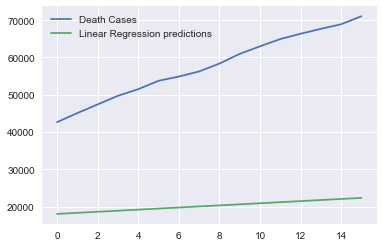

In [33]:
plt.plot(y_test_deaths)
plt.plot(test_linear_pred)
plt.legend(['Death Cases', 'Linear Regression predictions'])

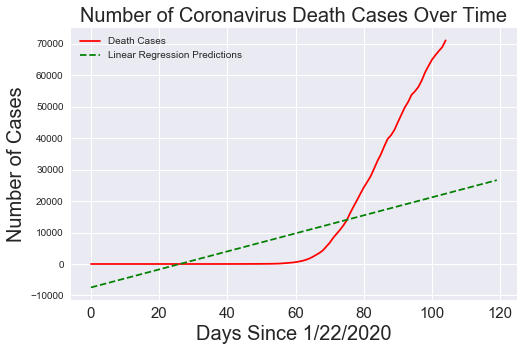

In [34]:
#Linear Regression predictions
plt.figure(figsize=(8, 5))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.plot(futureForecast, linear_pred, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Death Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Death Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [35]:
print('Linear regression future predictions:')
print(linear_pred[-14:])

Linear regression future predictions:
[[22915.12614913]
 [23201.59882533]
 [23488.07150153]
 [23774.54417773]
 [24061.01685393]
 [24347.48953013]
 [24633.96220633]
 [24920.43488253]
 [25206.90755873]
 [25493.38023493]
 [25779.85291113]
 [26066.32558733]
 [26352.79826353]
 [26639.27093973]]


In [36]:
from sklearn.externals import joblib
joblib.dump(linear_model, 'model_reg_d.pkl')

['model_reg_d.pkl']

In [37]:
linear_model = joblib.load('model_reg_d.pkl')

In [38]:
print("Bayesian Ridge Regression for the total deaths")
#Bayesian Ridge Regression for the total deaths
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_deaths, y_train_deaths)
bayesian_search.best_params_

Bayesian Ridge Regression for the total deaths
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'tol': 0.001,
 'lambda_2': 0.0001,
 'lambda_1': 0.0001,
 'alpha_2': 1e-06,
 'alpha_1': 1e-05}

MAE: 37643.23126889532
MSE: 1470618272.3292856


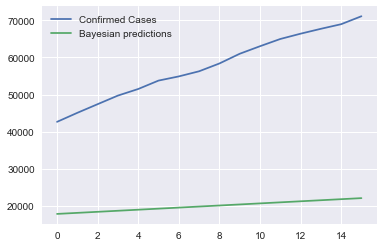

In [39]:
bayesian_deaths = bayesian_search.best_estimator_
test_bayesian_pred_deaths = bayesian_deaths.predict(X_test_deaths)
bayesian_pred_deaths = bayesian_deaths.predict(futureForecast)
print('MAE:', mean_absolute_error(test_bayesian_pred_deaths, y_test_deaths))
print('MSE:',mean_squared_error(test_bayesian_pred_deaths, y_test_deaths))
plt.plot(y_test_deaths)
plt.plot(test_bayesian_pred_deaths)
plt.legend(['Confirmed Cases', 'Bayesian predictions'])

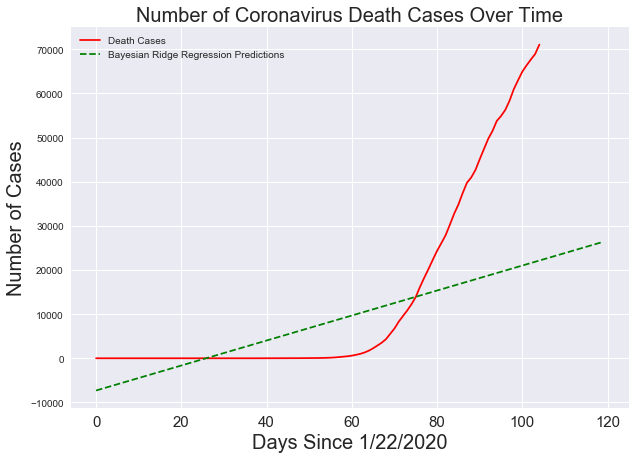

In [40]:
#Bayesian Predictions
plt.figure(figsize=(10, 7))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.plot(futureForecast, bayesian_pred_deaths, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Death Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Death Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [41]:
print('Bayesian regression future predictions:')
print(set(zip(future_forecast_dates[-14:], bayesian_pred_deaths[-14:])))

Bayesian regression future predictions:
{('05/11/2020', 23839.21977560383), ('05/18/2020', 25821.004576455238), ('05/19/2020', 26104.116690862586), ('05/08/2020', 22989.883432381794), ('05/16/2020', 25254.78034764055), ('05/07/2020', 22706.77131797445), ('05/12/2020', 24122.331890011174), ('05/10/2020', 23556.107661196485), ('05/09/2020', 23272.995546789138), ('05/14/2020', 24688.55611882586), ('05/15/2020', 24971.668233233206), ('05/20/2020', 26387.228805269926), ('05/17/2020', 25537.892462047897), ('05/13/2020', 24405.444004418518)}


In [42]:
from sklearn.externals import joblib
joblib.dump(bayesian_search, 'model_bayesian_d.pkl')

['model_bayesian_d.pkl']

In [43]:
bayesian_search = joblib.load('model_bayesian_d.pkl')